In [ ]:
!unzip dataset.zip

Archive:  dataset.zip
   creating: dataset/
   creating: dataset/0/
  inflating: dataset/0/0 (0).jpg     
  inflating: dataset/0/0 (1).jpg     
  inflating: dataset/0/0 (2).jpg     
  inflating: dataset/0/0 (3).jpg     
  inflating: dataset/0/0 (4).jpg     
  inflating: dataset/0/0 (5).jpg     
  inflating: dataset/0/0 (6).jpg     
  inflating: dataset/0/0 (7).jpg     
  inflating: dataset/0/0 (8).jpg     
  inflating: dataset/0/0 (9).jpg     
  inflating: dataset/0/0 (TH Mali Grade6 Italic.ttf).jpg  
  inflating: dataset/0/0 (TH Mali Grade6.ttf).jpg  
  inflating: dataset/0/0 (TH Niramit AS Bold Italic.ttf).jpg  
  inflating: dataset/0/0 (TH Niramit AS Bold.ttf).jpg  
  inflating: dataset/0/0 (TH Niramit AS Italic.ttf).jpg  
  inflating: dataset/0/0 (TH Niramit AS.ttf).jpg  
  inflating: dataset/0/0 (THSarabun Bold Italic.ttf).jpg  
  inflating: dataset/0/0 (THSarabun Bold.ttf).jpg  
  inflating: dataset/0/0 (THSarabun Italic.ttf).jpg  
  inflating: dataset/0/0 (THSarabun.ttf).jpg  
 

In [ ]:
#Generate Dataset
import os
import random
import string
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import shutil
# Define the size of the image
IMAGE_WIDTH = 72
IMAGE_HEIGHT = 72

# Define the path to the Thai font file
THAI_FONT_LIST = os.listdir("fonts")
#THAI_FONT_FILE = "Sarun's_ThangLuang.ttf"

# Define the characters to be included in the dataset
CHARACTERS = ''.join([
    '0123456789',  # Numbers
    'กขฃคฅฆงจฉชซฌญฎฏฐฑฒณดตถทธนบปผฝพฟภมยรลวศษสหฬอฮ'  # Thai characters
])

# Define the number of images to be generated for each character
NUM_IMAGES_PER_CHARACTER = 10

# Define the output directory for the dataset
OUTPUT_DIR = 'dataset/'


# Create the output directory if it doesn't exist
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

for THAI_FONT_FILE in THAI_FONT_LIST :
    # Load the Thai font
    font = ImageFont.truetype("fonts/"+THAI_FONT_FILE, IMAGE_WIDTH)

    # Generate the images
    for char in CHARACTERS:
        if not os.path.exists(OUTPUT_DIR+char):
            os.makedirs(OUTPUT_DIR+char)
        # Create a new image
        image = Image.new('L', (IMAGE_WIDTH, IMAGE_HEIGHT), color=255)
        
        # Draw the character on the image
        draw = ImageDraw.Draw(image)
        draw.text((20, -50), char, fill=0, font=font)
        
        # Add noise to the image
        image_array = np.array(image)
        noise = np.random.normal(0, 10, size=(IMAGE_HEIGHT, IMAGE_WIDTH))
        image_array = np.clip(image_array + noise, 0, 255).astype(np.uint8)
        image = Image.fromarray(image_array)
        
        # Save the image
        filename = f'{char} ({THAI_FONT_FILE}).jpg'
        filepath = os.path.join(OUTPUT_DIR+char, filename)
        image.save(filepath)


In [ ]:
#Get dataset from directory
import keras
from keras.datasets import cifar10
from keras.utils import image_dataset_from_directory, to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

import numpy as np
import os, random, tensorflow as tf

def set_seed(seed_value=1234):
    random.seed(seed_value)
    np.random.seed(seed_value)
    tf.random.set_seed(seed_value)
    os.environ['PYTHONHASHSEED'] = str(seed_value)

set_seed(1234)

datagen = ImageDataGenerator(
    rescale=1./255,
    brightness_range=(0.2,0.8),
    shear_range=0.2,
    zca_whitening=True,  # apply ZCA whitening
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

train = datagen.flow_from_directory('dataset', subset="training", color_mode = 'grayscale',batch_size=20, seed=1234,target_size=(72, 72),shuffle=True)
val = test_datagen.flow_from_directory('dataset',subset="validation", color_mode = 'grayscale',batch_size=20, seed=1234,target_size=(72, 72),shuffle=True)





num_classes = len(train.class_indices)

labels = dict((v,k) for k,v in train.class_indices.items())


Found 2050 images belonging to 54 classes.
Found 498 images belonging to 54 classes.


e:\Users\uSEr\anaconda3\lib\site-packages\keras\preprocessing\image.py:1446: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn(


In [ ]:
#Train Model


model_1 = Sequential()


model_1.add(Conv2D(32, (5, 5), strides = (2,2), padding='same',
                 input_shape=(72,72,1)))
model_1.add(Activation('relu'))
model_1.add(Conv2D(32, (5, 5), strides = (2,2)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()

batch_size = 64

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0005, decay=1e-6)

# Let's train the model using RMSprop
model_1.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

print(train)
STEP_SIZE_TRAIN=train.n//train.batch_size
STEP_SIZE_VALID=val.n//val.batch_size
model_1.fit_generator(generator=train,
            steps_per_epoch=STEP_SIZE_TRAIN,
            epochs=150,
            validation_steps=STEP_SIZE_VALID,
            validation_data=val)

model_1.save('OCR.h5')


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 36, 36, 32)        832       
                                                                 
 activation (Activation)     (None, 36, 36, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        25632     
                                                                 
 activation_1 (Activation)   (None, 16, 16, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 32)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 8, 8, 32)          0         
                                                        

e:\Users\uSEr\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\uSEr\AppData\Local\Temp\ipykernel_6592\1962533041.py:31: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_1.fit_generator(generator=train,
e:\Users\uSEr\anaconda3\lib\site-packages\keras\preprocessing\image.py:1863: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
e:\Users\uSEr\anaconda3\lib\site-packages\keras\preprocessing\image.py:1886: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/150
102/102 [==============================] - 46s 401ms/step - loss: 3.9856 - accuracy: 0.0207 - val_loss: 3.9640 - val_accuracy: 0.0229
Epoch 2/150
102/102 [==============================] - 4s 37ms/step - loss: 3.9519 - accuracy: 0.0261 - val_loss: 3.9449 - val_accuracy: 0.0292
Epoch 3/150
102/102 [==============================] - 3s 31ms/step - loss: 3.8625 - accuracy: 0.0517 - val_loss: 3.8283 - val_accuracy: 0.0812
Epoch 4/150
102/102 [==============================] - 3s 31ms/step - loss: 3.7104 - accuracy: 0.0734 - val_loss: 3.7175 - val_accuracy: 0.0771
Epoch 5/150
102/102 [==============================] - 3s 34ms/step - loss: 3.5601 - accuracy: 0.0980 - val_loss: 3.6256 - val_accuracy: 0.0625
Epoch 6/150
102/102 [==============================] - 3s 30ms/step - loss: 3.3865 - accuracy: 0.1305 - val_loss: 3.4127 - val_accuracy: 0.1250
Epoch 7/150
102/102 [==============================] - 4s 44ms/step - loss: 3.1819 - accuracy: 0.1665 - val_loss: 3.3425 - val_accurac

110


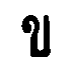

1/1 [==============================] - 0s 84ms/step


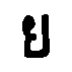

1/1 [==============================] - 0s 28ms/step


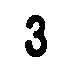

1/1 [==============================] - 0s 27ms/step


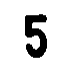

1/1 [==============================] - 0s 25ms/step


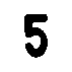

1/1 [==============================] - 0s 29ms/step


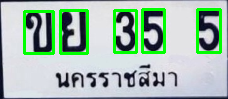

Vehicle plate: ขย355


In [6]:
#Predict License plate in Image
import cv2
import imutils
from keras.models import load_model
from tensorflow.keras.utils import img_to_array
import functools
import numpy as np
from google.colab.patches import cv2_imshow
original_image = cv2.imread('image8.jpg')
#cv2.imshow('image',original_image)

original_image = imutils.resize(original_image, width=500 )
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY) 
gray_image = cv2.bilateralFilter(gray_image, 11, 17, 17)

#cv2.imshow('image',original_image)
#cv2.imshow('image',gray_image)

edged_image = cv2.Canny(gray_image, 10, 200)
#cv2.imshow('image',edged_image)


contours, new = cv2.findContours(edged_image.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
img1 = original_image.copy()
cv2.drawContours(img1, contours, -1, (0, 0,255), 3)
#cv2.imshow('image',img1)
print(len(contours))


contours = sorted(contours, key = cv2.contourArea, reverse = True)[:100]
screenCnt = None
img2 = original_image.copy()

cv2.drawContours(img2, contours, -1, (0, 0,255), 3)
#cv2_imshow(img2)

count = 0
idx = 7

for c in contours :
    contour_perimeter = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.018 * contour_perimeter, True)

    if len(approx) == 4:
        screenCnt = approx
        x, y, w, h = cv2.boundingRect(c)
        new_img = original_image [ y: y + h, x: x + w]
        cv2.imwrite('cropped.png',new_img)
        idx += 1
        break
        
cv2.drawContours(original_image , [screenCnt], -1, (0, 0,255), 3)
#cv2.imshow('image',original_image )


cropped_License_Plate = 'cropped.png' 




image = cv2.imread(cropped_License_Plate)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.adaptiveThreshold(blurred, 255,
    cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 45, 15)


_, labels = cv2.connectedComponents(thresh)
mask = np.zeros(thresh.shape, dtype="uint8")


total_pixels = image.shape[0] * image.shape[1]
lower = total_pixels // 70 
upper = total_pixels // 20 


for (i, label) in enumerate(np.unique(labels)):

    if label == 0:
        continue
 

    labelMask = np.zeros(thresh.shape, dtype="uint8")
    labelMask[labels == label] = 255
    numPixels = cv2.countNonZero(labelMask)
 

    if numPixels > lower and numPixels < upper:
        mask = cv2.add(mask, labelMask)
        

cnts, _ = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
boundingBoxes = [cv2.boundingRect(c) for c in cnts]


def compare(rect1, rect2):
    if abs(rect1[1] - rect2[1]) > 10:
        return rect1[1] - rect2[1]
    else:
        return rect1[0] - rect2[0]
boundingBoxes = sorted(boundingBoxes, key=functools.cmp_to_key(compare) )


TARGET_WIDTH = 72
TARGET_HEIGHT = 72
chars = ''.join([
    '0123456789',
    'กขฃคฅฆงจฉชซฌญฎฏฐฑฒณดตถทธนบปผฝพฟภมยรลวศษสหฬอฮ' 
])
model = load_model('OCR.h5')

vehicle_plate = ""

for rect in boundingBoxes:

    x,y,w,h = rect

    crop = mask[y:y+h, x:x+w]
    crop = cv2.bitwise_not(crop)

    rows = crop.shape[0]
    columns = crop.shape[1]

    if rows > TARGET_HEIGHT or columns > TARGET_WIDTH:
      continue
    paddingY = (TARGET_HEIGHT - rows) // 2 if rows < TARGET_HEIGHT else int(0.17 * rows)
    paddingX = (TARGET_WIDTH - columns) // 2 if columns < TARGET_WIDTH else int(0.45 * columns)
    

    crop = cv2.copyMakeBorder(crop, paddingY, paddingY, paddingX, paddingX, cv2.BORDER_CONSTANT, None, 255)

    crop = cv2.resize(crop, (TARGET_WIDTH, TARGET_HEIGHT))
    cv2_imshow(crop)

    crop = crop.astype("float") / 255.0
    crop = img_to_array(crop)
    crop = np.expand_dims(crop, axis=0)

    prob = model.predict(crop)[0]
    idx = np.argsort(prob)[-1]
    vehicle_plate += chars[idx]

    cv2.rectangle(image, (x,y), (x+w,y+h), (0, 255, 0), 2)
    
# Show final image
cv2_imshow(image)
print("Vehicle plate: " + vehicle_plate)
